<a href="https://colab.research.google.com/github/aqibfirdous/DS-ML/blob/main/DiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DISEASE PREDICTION#

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [44]:
print(os.listdir())

['.config', 'U.S._Chronic_Disease_Indicators__CDI_.csv', 'xgboost_model.pkl', 'U.S._Chronic_Disease_Indicators__CDI_ (1).csv', '.ipynb_checkpoints', 'sample_data']


In [45]:
df =  pd.read_csv("/content/U.S._Chronic_Disease_Indicators__CDI_ (1).csv",low_memory=False)

In [46]:
import pandas as pd

# Read the CSV file with low_memory=False to suppress the warning
df = pd.read_csv("/content/U.S._Chronic_Disease_Indicators__CDI_ (1).csv", low_memory=False)
df


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2014,2014,AR,Arkansas,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,5.0,AST,AST3_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
1,2018,2018,CO,Colorado,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,8.0,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2018,2018,DC,District of Columbia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,11.0,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2017,2017,GA,Georgia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,13.0,AST,AST3_1,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
4,2010,2010,MI,Michigan,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,26.0,AST,AST3_1,NMBR,RACE,HIS,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50415,2009,2013,IA,Iowa,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...",NaN,"per 100,000",Average Annual Age-adjusted Rate,...,19.0,CAN,CAN10_1,AVGANNAGEADJRATE,RACE,APIO,NaN,NaN,NaN,NaN
50416,2012,2016,ID,Idaho,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...",NaN,"per 100,000",Average Annual Age-adjusted Rate,...,16.0,CAN,CAN10_1,AVGANNAGEADJRATE,GENDER,GENF,NaN,NaN,NaN,NaN
50417,2016,2016,TX,Texas,NVSS,Asthma,Asthma mortality rate,NaN,"cases per 1,000,000",Crude Rate,...,48.0,AST,AST4_1,CRDRATE,RACE,BLK,NaN,NaN,NaN,NaN
50418,2013,2017,UT,Utah,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...",NaN,NaN,Average Annual Number,...,49.0,CAN,CAN10_1,AVGANNNMBR,RACE,WHT,NaN,NaN,NaN,NaN


## Data pre-processing

In [47]:
#handling the problem
df.isnull().sum()

YearStart                        0
YearEnd                          0
LocationAbbr                     0
LocationDesc                     0
DataSource                       0
Topic                            0
Question                         0
Response                     50420
DataValueUnit                13647
DataValueType                    0
DataValue                    23997
DataValueAlt                 24300
DataValueFootnoteSymbol      25366
DatavalueFootnote            25366
LowConfidenceLimit           32553
HighConfidenceLimit          32553
StratificationCategory1          1
Stratification1                  1
StratificationCategory2      50420
Stratification2              50420
StratificationCategory3      50420
Stratification3              50420
GeoLocation                    247
ResponseID                   50420
LocationID                       1
TopicID                          1
QuestionID                       1
DataValueTypeID                  1
StratificationCatego

<Axes: >

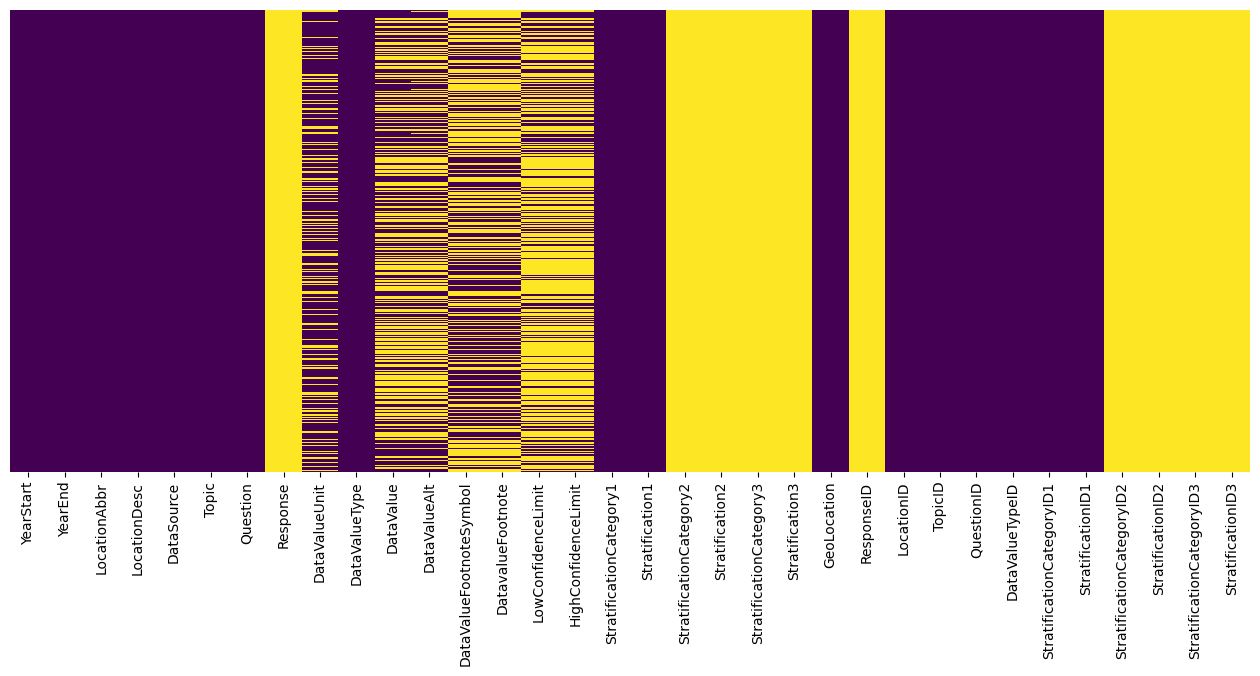

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

###Methods for Data Cleaning


In [49]:
df.fillna(method='ffill')

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2014,2014,AR,Arkansas,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,5.0,AST,AST3_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
1,2018,2018,CO,Colorado,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,8.0,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2018,2018,DC,District of Columbia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,11.0,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2017,2017,GA,Georgia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,13.0,AST,AST3_1,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
4,2010,2010,MI,Michigan,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,26.0,AST,AST3_1,NMBR,RACE,HIS,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50415,2009,2013,IA,Iowa,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...",NaN,"per 100,000",Average Annual Age-adjusted Rate,...,19.0,CAN,CAN10_1,AVGANNAGEADJRATE,RACE,APIO,NaN,NaN,NaN,NaN
50416,2012,2016,ID,Idaho,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...",NaN,"per 100,000",Average Annual Age-adjusted Rate,...,16.0,CAN,CAN10_1,AVGANNAGEADJRATE,GENDER,GENF,NaN,NaN,NaN,NaN
50417,2016,2016,TX,Texas,NVSS,Asthma,Asthma mortality rate,NaN,"cases per 1,000,000",Crude Rate,...,48.0,AST,AST4_1,CRDRATE,RACE,BLK,NaN,NaN,NaN,NaN
50418,2013,2017,UT,Utah,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...",NaN,"cases per 1,000,000",Average Annual Number,...,49.0,CAN,CAN10_1,AVGANNNMBR,RACE,WHT,NaN,NaN,NaN,NaN


In [50]:
df.interpolate()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2014,2014,AR,Arkansas,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,5.0,AST,AST3_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
1,2018,2018,CO,Colorado,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,8.0,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2018,2018,DC,District of Columbia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,11.0,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2017,2017,GA,Georgia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,13.0,AST,AST3_1,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
4,2010,2010,MI,Michigan,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,26.0,AST,AST3_1,NMBR,RACE,HIS,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50415,2009,2013,IA,Iowa,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...",NaN,"per 100,000",Average Annual Age-adjusted Rate,...,19.0,CAN,CAN10_1,AVGANNAGEADJRATE,RACE,APIO,NaN,NaN,NaN,NaN
50416,2012,2016,ID,Idaho,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...",NaN,"per 100,000",Average Annual Age-adjusted Rate,...,16.0,CAN,CAN10_1,AVGANNAGEADJRATE,GENDER,GENF,NaN,NaN,NaN,NaN
50417,2016,2016,TX,Texas,NVSS,Asthma,Asthma mortality rate,NaN,"cases per 1,000,000",Crude Rate,...,48.0,AST,AST4_1,CRDRATE,RACE,BLK,NaN,NaN,NaN,NaN
50418,2013,2017,UT,Utah,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...",NaN,NaN,Average Annual Number,...,49.0,CAN,CAN10_1,AVGANNNMBR,RACE,WHT,NaN,NaN,NaN,NaN


In [51]:
columns_to_fill = ['StratificationCategoryID2', 'StratificationID2', 'StratificationCategoryID3',
                   'StratificationID3', 'Response','ResponseID','StratificationCategory2', 'Stratification2',
                   'StratificationCategory3', 'Stratification3','DataValueUnit', 'DataValue', 'DataValueFootnoteSymbol',
                   'DatavalueFootnote', 'GeoLocation','LowConfidenceLimit','HighConfidenceLimit','DataValueAlt']
fill_value = 9999

df.fillna({col: fill_value for col in columns_to_fill}, inplace=True)


### Cleaned Dataset

<Axes: >

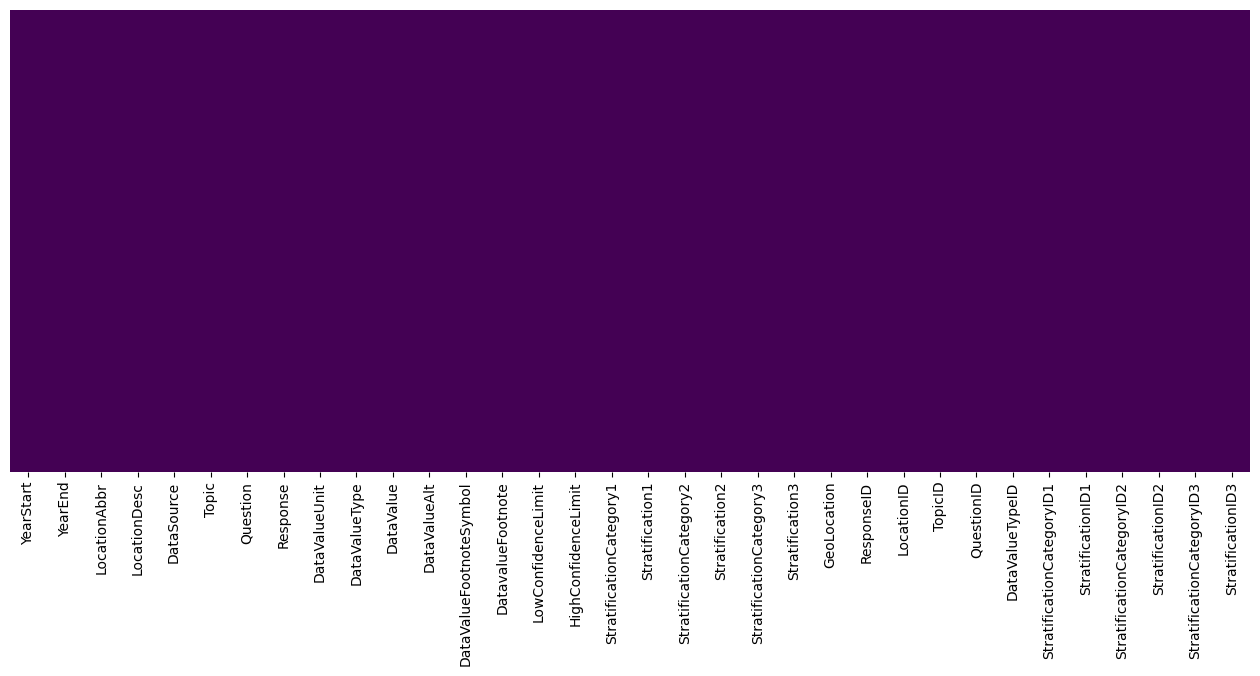

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [53]:
print(df.columns)

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'GeoLocation', 'ResponseID', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')


In [54]:
import pandas as pd

# Load your dataset
df = pd.read_csv("/content/U.S._Chronic_Disease_Indicators__CDI_ (1).csv", low_memory=False)

# Extract feature names from column names
feature_names = df.columns.tolist()

# Assuming the target column is named 'target', extract class names
class_names = df['Topic'].unique().tolist()

print("Feature Names:", feature_names)
print("Class Names:", class_names)


Feature Names: ['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource', 'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType', 'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol', 'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1', 'StratificationCategory2', 'Stratification2', 'StratificationCategory3', 'Stratification3', 'GeoLocation', 'ResponseID', 'LocationID', 'TopicID', 'QuestionID', 'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1', 'StratificationCategoryID2', 'StratificationID2', 'StratificationCategoryID3', 'StratificationID3']
Class Names: ['Asthma', 'Cancer', 'Chronic Kidney Disease', 'Chronic Obstructive Pulmonary Disease', 'Cardiovascular Disease', 'Diabetes', 'Disability', 'Reproductive Health', 'Tobacco', 'Alcohol', 'Arthritis']


##Changing the categorical data to numeric

In [55]:
df.select_dtypes(object)

,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueFootnoteSymbol,DatavalueFootnote,StratificationCategory1,Stratification1,GeoLocation,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,AR,Arkansas,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,Number,916,NaN,NaN,Gender,Male,POINT (-92.27449074299966 34.74865012400045),AST,AST3_1,NMBR,GENDER,GENM
1,CO,Colorado,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,Number,2227,NaN,NaN,Overall,Overall,POINT (-106.13361092099967 38.843840757000464),AST,AST3_1,NMBR,OVERALL,OVR
2,DC,District of Columbia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,Number,708,NaN,NaN,Overall,Overall,POINT (-77.036871 38.907192),AST,AST3_1,NMBR,OVERALL,OVR
3,GA,Georgia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,Number,3520,NaN,NaN,Gender,Female,POINT (-83.62758034599966 32.83968109300048),AST,AST3_1,NMBR,GENDER,GENF
4,MI,Michigan,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,Number,123,NaN,NaN,Race/Ethnicity,Hispanic,POINT (-84.71439026999968 44.6613195430005),AST,AST3_1,NMBR,RACE,HIS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54027,NC,North Carolina,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...","per 100,000",Average Annual Age-adjusted Rate,19.5,NaN,NaN,Gender,Male,POINT (-79.15925046299964 35.466220975000454),CAN,CAN10_1,AVGANNAGEADJRATE,GENDER,GENM
54028,NJ,New Jersey,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...",NaN,Average Annual Number,1070,NaN,NaN,Overall,Overall,POINT (-74.27369128799967 40.13057004800049),CAN,CAN10_1,AVGANNNMBR,OVERALL,OVR
54029,MA,Massachusetts,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...","per 100,000",Average Annual Age-adjusted Rate,NaN,~~~~,The state registry opted not to present state-...,Race/Ethnicity,Hispanic,POINT (-72.08269067499964 42.27687047000046),CAN,CAN10_1,AVGANNAGEADJRATE,RACE,HIS
54030,SC,South Carolina,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...","per 100,000",Average Annual Age-adjusted Rate,10.1,NaN,NaN,Race/Ethnicity,"White, non-Hispanic",POINT (-81.04537120699968 33.998821303000454),CAN,CAN10_1,AVGANNAGEADJRATE,RACE,WHT


###Method

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [57]:
# Iterate through the columns and apply the LabelEncoder
for column in df.columns:
    # Convert all values in the column to strings
    df[column] = df[column].astype(str)
    # Apply the LabelEncoder to the column
    df[column] = le.fit_transform(df[column])

# Now, all columns, whether they contain integers or strings, are label encoded
print(df)

       YearStart  YearEnd  LocationAbbr  LocationDesc  DataSource  Topic  \
0              6        4             2             3           9      2   
1             10        8             5             5           9      2   
2             10        8             7             8           9      2   
3              9        7            10            10           9      2   
4              2        0            23            23           9      2   
...          ...      ...           ...           ...         ...    ...   
54027          5        7            28            34          11      3   
54028          1        3            32            31          11      3   
54029          3        5            20            22          11      3   
54030          2        4            42            42          11      3   
54031          3        1            42            42           7      2   

       Question  Response  DataValueUnit  DataValueType  ...  LocationID  \
0          

##Model Building

In [58]:
y=df['Topic']
y

0        2
1        2
2        2
3        2
4        2
        ..
54027    3
54028    3
54029    3
54030    3
54031    2
Name: Topic, Length: 54032, dtype: int64

In [59]:
x = df.drop('Topic',axis=1)
x

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Question,Response,DataValueUnit,DataValueType,DataValue,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,6,4,2,3,9,27,0,7,9,5464,...,41,2,12,9,0,7,0,0,0,0
1,10,8,5,5,9,27,0,7,9,1873,...,53,2,12,9,1,11,0,0,0,0
2,10,8,7,8,9,27,0,7,9,4861,...,2,2,12,9,1,11,0,0,0,0
3,9,7,10,10,9,27,0,7,9,2889,...,4,2,12,9,0,6,0,0,0,0
4,2,0,23,23,9,27,0,7,9,626,...,17,2,12,9,2,8,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54027,5,7,28,34,11,29,0,9,2,1476,...,28,3,14,2,0,7,0,0,0,0
54028,1,3,32,31,11,29,0,7,4,304,...,25,3,14,4,1,11,0,0,0,0
54029,3,5,20,22,11,29,0,9,2,5604,...,16,3,14,2,2,8,0,0,0,0
54030,2,4,42,42,11,29,0,9,2,142,...,36,3,14,2,2,12,0,0,0,0


### Splitting the training and testing data

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)


In [61]:
x_train

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Question,Response,DataValueUnit,DataValueType,DataValue,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
36092,10,8,28,34,9,27,0,4,1,1636,...,28,2,12,1,2,12,0,0,0,0
3190,3,1,29,35,7,15,0,5,1,4689,...,29,0,4,1,2,0,0,0,0,0
17234,4,2,23,23,2,5,0,0,11,37,...,17,0,7,11,1,11,0,0,0,0
15437,12,10,31,30,7,15,0,7,9,4886,...,24,0,4,9,0,6,0,0,0,0
7680,5,3,14,13,12,1,0,1,6,2273,...,6,0,1,6,0,7,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,2,0,42,42,7,15,0,7,9,5604,...,36,0,4,9,2,8,0,0,0,0
79,2,4,4,4,5,12,0,7,4,4414,...,49,3,21,4,0,6,0,0,0,0
12119,6,4,3,2,7,15,0,7,9,4508,...,31,0,4,9,2,12,0,0,0,0
14147,10,8,26,25,7,15,0,5,1,4373,...,19,0,4,1,2,5,0,0,0,0


In [62]:
x_test

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Question,Response,DataValueUnit,DataValueType,DataValue,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
15856,7,5,26,25,7,15,0,7,9,5604,...,19,0,4,9,2,8,0,0,0,0
6054,6,4,38,38,7,15,0,5,7,4314,...,33,0,4,7,2,8,0,0,0,0
40527,10,8,10,10,7,7,0,3,1,1289,...,4,2,13,1,2,5,0,0,0,0
12915,9,7,0,1,7,15,0,7,9,4081,...,10,0,4,9,0,7,0,0,0,0
21596,8,6,53,52,1,37,0,6,10,117,...,45,0,5,10,1,11,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16808,9,7,52,53,7,15,0,5,1,5604,...,46,0,4,1,2,0,0,0,0,0
37272,4,2,28,34,7,7,0,3,1,2005,...,28,2,13,1,2,5,0,0,0,0
46875,2,0,38,38,7,7,0,3,1,1382,...,33,2,13,1,0,6,0,0,0,0
24064,8,6,8,7,9,18,0,4,7,5604,...,1,2,11,7,0,7,0,0,0,0


In [63]:
y_train

36092    2
3190     0
17234    0
15437    0
7680     0
        ..
16304    0
79       3
12119    0
14147    0
38408    2
Name: Topic, Length: 43225, dtype: int64

In [64]:
y_test

15856    0
6054     0
40527    2
12915    0
21596    0
        ..
16808    0
37272    2
46875    2
24064    2
42124    2
Name: Topic, Length: 10807, dtype: int64

##XGB ALGORITHM

In [65]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df[['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
        'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'GeoLocation', 'ResponseID', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3']]
y = df['Topic']
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit the label encoder to your class labels (training and test combined)
all_labels = pd.concat([y_train, y_test], axis=0)
label_encoder.fit(all_labels)

# Transform both the training and test labels
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create and train the XGBoost classifier with the encoded class labels
model = xgb.XGBClassifier()
model.fit(x_train, y_train_encoded)

# Make predictions on the training set
y_xgb_train_pred = model.predict(x_train)

# Make predictions on the test set
y_xgb_test_pred = model.predict(x_test)

# Calculate accuracy for training and test sets
train_accuracy = accuracy_score(y_train_encoded, y_xgb_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_xgb_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


# Split your data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Create and train the XGBoost classifier
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

# Make predictions on the training set
y_xgb_train_pred = model.predict(x_train)

# Make predictions on the test set
y_xgb_test_pred = model.predict(x_test)

# Print the predictions
print("Predictions on the training set:", y_xgb_train_pred)
print("Predictions on the test set:", y_xgb_test_pred)

# Calculate accuracy for training and test sets
train_accuracy = accuracy_score(y_train, y_xgb_train_pred)
test_accuracy = accuracy_score(y_test, y_xgb_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 1.0
Predictions on the training set: [2 0 0 ... 0 0 2]
Predictions on the test set: [0 0 2 ... 2 2 2]
Training Accuracy: 1.0
Test Accuracy: 1.0


### Model

In [66]:
import joblib

# Save the trained model to a file
model_filename = 'xgboost_model.pkl'
joblib.dump(model, model_filename)

# Load the saved model from the file
loaded_model = joblib.load(model_filename)

# You can now use loaded_model for predictions
y_test_pred = loaded_model.predict(x_test)


In [67]:
x = df.drop('Topic',axis=1)
x

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Question,Response,DataValueUnit,DataValueType,DataValue,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,6,4,2,3,9,27,0,7,9,5464,...,41,2,12,9,0,7,0,0,0,0
1,10,8,5,5,9,27,0,7,9,1873,...,53,2,12,9,1,11,0,0,0,0
2,10,8,7,8,9,27,0,7,9,4861,...,2,2,12,9,1,11,0,0,0,0
3,9,7,10,10,9,27,0,7,9,2889,...,4,2,12,9,0,6,0,0,0,0
4,2,0,23,23,9,27,0,7,9,626,...,17,2,12,9,2,8,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54027,5,7,28,34,11,29,0,9,2,1476,...,28,3,14,2,0,7,0,0,0,0
54028,1,3,32,31,11,29,0,7,4,304,...,25,3,14,4,1,11,0,0,0,0
54029,3,5,20,22,11,29,0,9,2,5604,...,16,3,14,2,2,8,0,0,0,0
54030,2,4,42,42,11,29,0,9,2,142,...,36,3,14,2,2,12,0,0,0,0


In [68]:
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)


Shape of x: (54032, 33)
Shape of y: (54032,)


In [69]:
from sklearn.model_selection import train_test_split
import numpy as np

# Randomly resample y to match the size of x
y_resampled = np.random.choice(y, size=len(x), replace=True)

# Split the resampled data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_resampled, test_size=0.2, random_state=100)


In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
x_train

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Question,Response,DataValueUnit,DataValueType,DataValue,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
36092,10,8,28,34,9,27,0,4,1,1636,...,28,2,12,1,2,12,0,0,0,0
3190,3,1,29,35,7,15,0,5,1,4689,...,29,0,4,1,2,0,0,0,0,0
17234,4,2,23,23,2,5,0,0,11,37,...,17,0,7,11,1,11,0,0,0,0
15437,12,10,31,30,7,15,0,7,9,4886,...,24,0,4,9,0,6,0,0,0,0
7680,5,3,14,13,12,1,0,1,6,2273,...,6,0,1,6,0,7,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,2,0,42,42,7,15,0,7,9,5604,...,36,0,4,9,2,8,0,0,0,0
79,2,4,4,4,5,12,0,7,4,4414,...,49,3,21,4,0,6,0,0,0,0
12119,6,4,3,2,7,15,0,7,9,4508,...,31,0,4,9,2,12,0,0,0,0
14147,10,8,26,25,7,15,0,5,1,4373,...,19,0,4,1,2,5,0,0,0,0


In [71]:
x_test

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Question,Response,DataValueUnit,DataValueType,DataValue,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
15856,7,5,26,25,7,15,0,7,9,5604,...,19,0,4,9,2,8,0,0,0,0
6054,6,4,38,38,7,15,0,5,7,4314,...,33,0,4,7,2,8,0,0,0,0
40527,10,8,10,10,7,7,0,3,1,1289,...,4,2,13,1,2,5,0,0,0,0
12915,9,7,0,1,7,15,0,7,9,4081,...,10,0,4,9,0,7,0,0,0,0
21596,8,6,53,52,1,37,0,6,10,117,...,45,0,5,10,1,11,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16808,9,7,52,53,7,15,0,5,1,5604,...,46,0,4,1,2,0,0,0,0,0
37272,4,2,28,34,7,7,0,3,1,2005,...,28,2,13,1,2,5,0,0,0,0
46875,2,0,38,38,7,7,0,3,1,1382,...,33,2,13,1,0,6,0,0,0,0
24064,8,6,8,7,9,18,0,4,7,5604,...,1,2,11,7,0,7,0,0,0,0


In [72]:
y_train

36092    2
3190     0
17234    0
15437    0
7680     0
        ..
16304    0
79       3
12119    0
14147    0
38408    2
Name: Topic, Length: 43225, dtype: int64

In [73]:
y_test

15856    0
6054     0
40527    2
12915    0
21596    0
        ..
16808    0
37272    2
46875    2
24064    2
42124    2
Name: Topic, Length: 10807, dtype: int64

##DECISION TREE

###Accuracy of Decision Tree

In [74]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into a training set and a testing set (you can also use cross-validation)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier instance
dtc = DecisionTreeClassifier()

# Train the model on the training data
dtc.fit(x_train, y_train)

# Make predictions on the test data
y_pred = dtc.predict(x_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Optionally, you can visualize the decision tree
# This requires the graphviz library to be installed
#from sklearn.tree import plot_tree
#import matplotlib.pyplot as plt
#plt.figure(figsize=(10, 6))
#plot_tree(dtc, filled=True, feature_names=feature_names, class_names=class_names)
#plt.show()


Accuracy: 1.0


In [75]:
import pandas as pd

# Load your dataset
df = pd.read_csv("/content/U.S._Chronic_Disease_Indicators__CDI_ (1).csv", low_memory=False)

# Extract feature names from column names
feature_names = df.columns.tolist()

# Assuming the target column is named 'target', extract class names
class_names = df['Topic'].unique().tolist()

print("Feature Names:", feature_names)
print("Class Names:", class_names)


Feature Names: ['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource', 'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType', 'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol', 'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1', 'StratificationCategory2', 'Stratification2', 'StratificationCategory3', 'Stratification3', 'GeoLocation', 'ResponseID', 'LocationID', 'TopicID', 'QuestionID', 'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1', 'StratificationCategoryID2', 'StratificationID2', 'StratificationCategoryID3', 'StratificationID3']
Class Names: ['Asthma', 'Cancer', 'Chronic Kidney Disease', 'Chronic Obstructive Pulmonary Disease', 'Cardiovascular Disease', 'Diabetes', 'Disability', 'Reproductive Health', 'Tobacco', 'Alcohol', 'Arthritis']


### Plot of Decision Tree

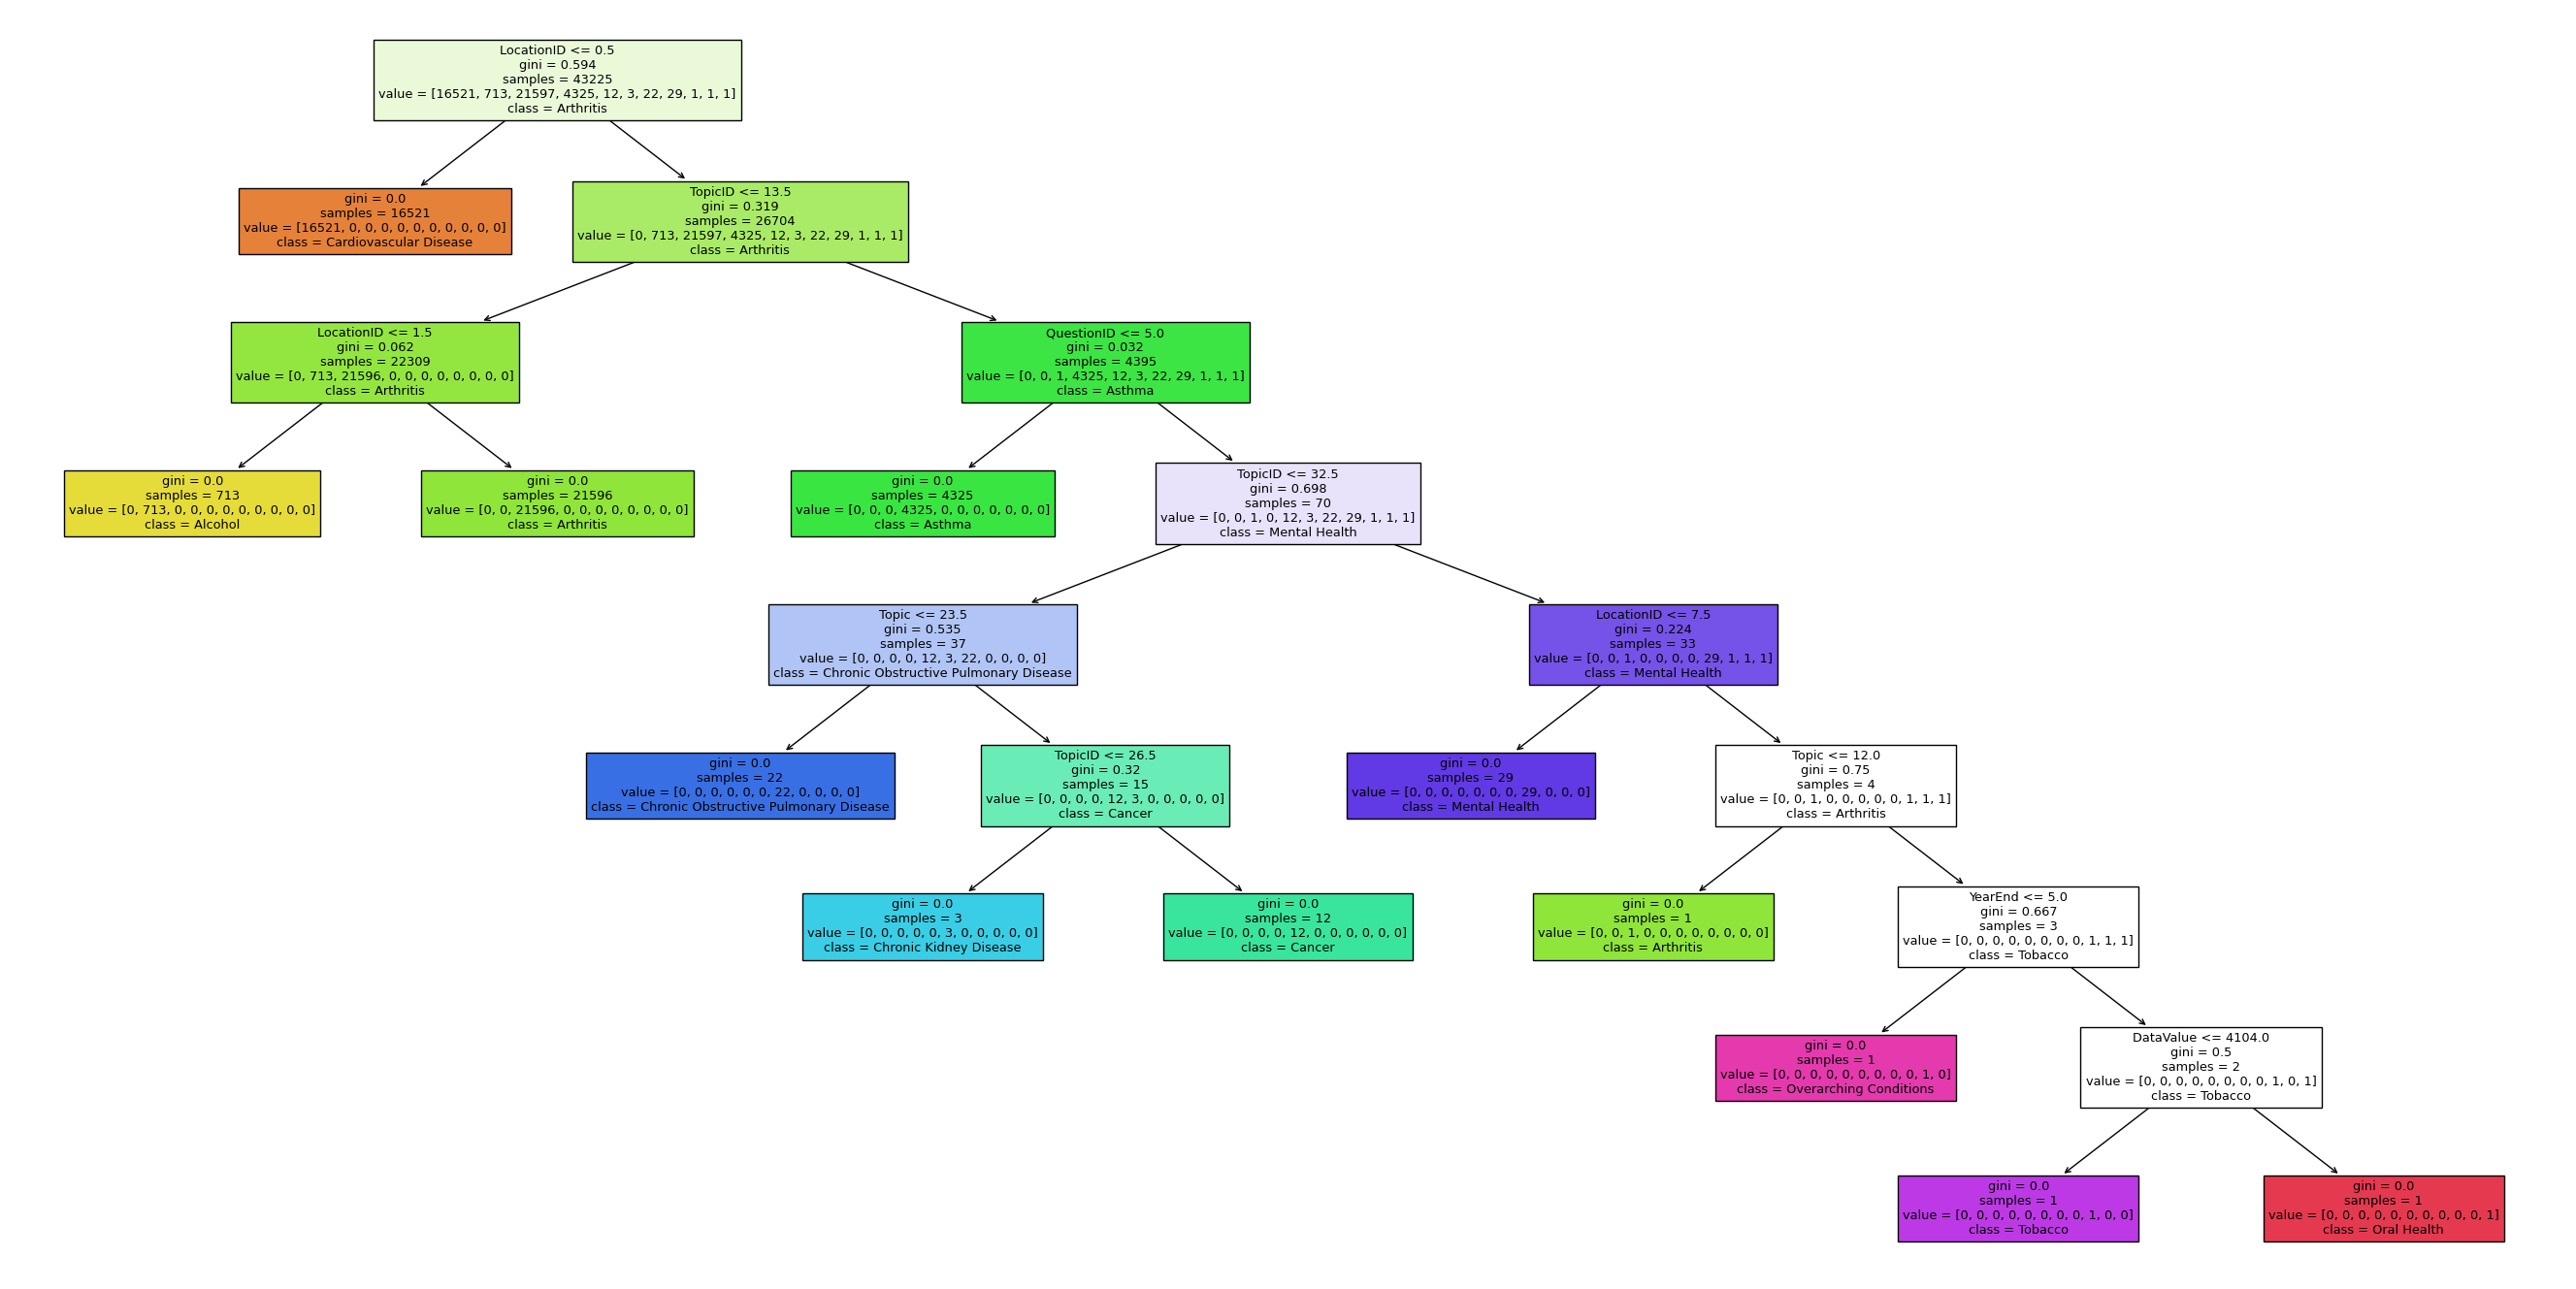

In [76]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier  # or DecisionTreeRegressor
dtc = DecisionTreeClassifier()  # or DecisionTreeRegressor
dtc.fit(x_train, y_train)  # Replace X_train and y_train with your training data
import matplotlib.pyplot as plt
plt.figure(figsize=(34, 17))
plot_tree(dtc, filled=True, feature_names=['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc',
                                           'DataSource', 'Topic', 'Question', 'Response', 'DataValueUnit',
                                           'DataValueType', 'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
                                           'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1',
                                           'Stratification1', 'StratificationCategory2', 'Stratification2', 'StratificationCategory3',
                                           'Stratification3', 'GeoLocation', 'ResponseID', 'LocationID', 'TopicID', 'QuestionID',
                                           'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1', 'StratificationCategoryID2',
                                           'StratificationID2', 'StratificationCategoryID3', 'StratificationID3'],
 class_names=['Cardiovascular Disease', 'Alcohol', 'Arthritis', 'Asthma', 'Cancer', 'Chronic Kidney Disease',
              'Chronic Obstructive Pulmonary Disease', 'Mental Health', 'Tobacco', 'Overarching Conditions', 'Oral Health',
              'Reproductive Health', 'Diabetes', 'Immunization', 'Nutrition, Physical Activity, and Weight Status',
              'Disability', 'Older Adults'])
plt.show()

### Model

In [77]:
import joblib

# Save the trained Decision Tree model to a file
model_filename = 'decision_tree_model.pkl'
joblib.dump(dtc, model_filename)

# Load the saved model from the file
loaded_model = joblib.load(model_filename)

# You can now use loaded_model for predictions
y_test_pred = loaded_model.predict(x_test)


In [78]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'class_column' is the name of the column containing class labels
num_classes = df['Topic'].nunique()
print("Number of classes:", num_classes)


Number of classes: 11


In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [80]:
# Iterate through the columns and apply the LabelEncoder
for column in df.columns:
    # Convert all values in the column to strings
    df[column] = df[column].astype(str)
    # Apply the LabelEncoder to the column
    df[column] = le.fit_transform(df[column])

# Now, all columns, whether they contain integers or strings, are label encoded
print(df)

       YearStart  YearEnd  LocationAbbr  LocationDesc  DataSource  Topic  \
0              6        4             2             3           9      2   
1             10        8             5             5           9      2   
2             10        8             7             8           9      2   
3              9        7            10            10           9      2   
4              2        0            23            23           9      2   
...          ...      ...           ...           ...         ...    ...   
54027          5        7            28            34          11      3   
54028          1        3            32            31          11      3   
54029          3        5            20            22          11      3   
54030          2        4            42            42          11      3   
54031          3        1            42            42           7      2   

       Question  Response  DataValueUnit  DataValueType  ...  LocationID  \
0          

In [81]:
y=df['Topic']
y

0        2
1        2
2        2
3        2
4        2
        ..
54027    3
54028    3
54029    3
54030    3
54031    2
Name: Topic, Length: 54032, dtype: int64

In [82]:
x = df.drop('Topic',axis=1)
x

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Question,Response,DataValueUnit,DataValueType,DataValue,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,6,4,2,3,9,27,0,7,9,5464,...,41,2,12,9,0,7,0,0,0,0
1,10,8,5,5,9,27,0,7,9,1873,...,53,2,12,9,1,11,0,0,0,0
2,10,8,7,8,9,27,0,7,9,4861,...,2,2,12,9,1,11,0,0,0,0
3,9,7,10,10,9,27,0,7,9,2889,...,4,2,12,9,0,6,0,0,0,0
4,2,0,23,23,9,27,0,7,9,626,...,17,2,12,9,2,8,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54027,5,7,28,34,11,29,0,9,2,1476,...,28,3,14,2,0,7,0,0,0,0
54028,1,3,32,31,11,29,0,7,4,304,...,25,3,14,4,1,11,0,0,0,0
54029,3,5,20,22,11,29,0,9,2,5604,...,16,3,14,2,2,8,0,0,0,0
54030,2,4,42,42,11,29,0,9,2,142,...,36,3,14,2,2,12,0,0,0,0


In [83]:
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)


Shape of x: (54032, 33)
Shape of y: (54032,)


In [84]:
from sklearn.model_selection import train_test_split
import numpy as np

# Randomly resample y to match the size of x
y_resampled = np.random.choice(y, size=len(x), replace=True)

# Split the resampled data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_resampled, test_size=0.2, random_state=100)
x_train

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Question,Response,DataValueUnit,DataValueType,DataValue,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
36092,10,8,28,34,9,27,0,4,1,1636,...,28,2,12,1,2,12,0,0,0,0
3190,3,1,29,35,7,15,0,5,1,4689,...,29,0,4,1,2,0,0,0,0,0
17234,4,2,23,23,2,5,0,0,11,37,...,17,0,7,11,1,11,0,0,0,0
15437,12,10,31,30,7,15,0,7,9,4886,...,24,0,4,9,0,6,0,0,0,0
7680,5,3,14,13,12,1,0,1,6,2273,...,6,0,1,6,0,7,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,2,0,42,42,7,15,0,7,9,5604,...,36,0,4,9,2,8,0,0,0,0
79,2,4,4,4,5,12,0,7,4,4414,...,49,3,21,4,0,6,0,0,0,0
12119,6,4,3,2,7,15,0,7,9,4508,...,31,0,4,9,2,12,0,0,0,0
14147,10,8,26,25,7,15,0,5,1,4373,...,19,0,4,1,2,5,0,0,0,0


In [85]:
x_test

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Question,Response,DataValueUnit,DataValueType,DataValue,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
15856,7,5,26,25,7,15,0,7,9,5604,...,19,0,4,9,2,8,0,0,0,0
6054,6,4,38,38,7,15,0,5,7,4314,...,33,0,4,7,2,8,0,0,0,0
40527,10,8,10,10,7,7,0,3,1,1289,...,4,2,13,1,2,5,0,0,0,0
12915,9,7,0,1,7,15,0,7,9,4081,...,10,0,4,9,0,7,0,0,0,0
21596,8,6,53,52,1,37,0,6,10,117,...,45,0,5,10,1,11,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16808,9,7,52,53,7,15,0,5,1,5604,...,46,0,4,1,2,0,0,0,0,0
37272,4,2,28,34,7,7,0,3,1,2005,...,28,2,13,1,2,5,0,0,0,0
46875,2,0,38,38,7,7,0,3,1,1382,...,33,2,13,1,0,6,0,0,0,0
24064,8,6,8,7,9,18,0,4,7,5604,...,1,2,11,7,0,7,0,0,0,0


In [86]:
y_train

array([1, 3, 0, ..., 0, 0, 2])

In [87]:
y_test

array([0, 0, 2, ..., 3, 0, 0])

##ANN ALGORITHM

In [88]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming you have your numeric feature data 'x' and labels 'y'
# Split your data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Standardize features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the number of classes
num_classes = 17  # Change this to the actual number of classes

# Create a function that builds the ANN model
def build_model(dropout_rate=0.5):
    model = keras.Sequential([
        layers.Input(shape=(x_train_scaled.shape[1],)),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'dropout_rate': [0.3, 0.4, 0.5],
    'batch_size': [64, 128],
    'num_epochs': [50, 100]
}

# Initialize K-Fold cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize variables to store the best hyperparameters and accuracy
best_hyperparameters = None
best_accuracy = 0.0

# Perform hyperparameter tuning
for dropout_rate in param_grid['dropout_rate']:
    for batch_size in param_grid['batch_size']:
        for num_epochs in param_grid['num_epochs']:
            print(f"Training model with dropout={dropout_rate}, batch_size={batch_size}, num_epochs={num_epochs}")

            # Build the model
            model = build_model(dropout_rate=dropout_rate)

            # Train the model
            model.fit(x_train_scaled, y_train, epochs=num_epochs, batch_size=batch_size, verbose=0)

            # Evaluate accuracy on the validation set
            y_val_pred = model.predict(x_test_scaled)
            y_val_pred_classes = np.argmax(y_val_pred, axis=1)
            accuracy_val = accuracy_score(y_test, y_val_pred_classes)

            print(f"Validation accuracy: {accuracy_val:.4f}\n")

            # Check if this model has the best accuracy so far
            if accuracy_val > best_accuracy:
                best_accuracy = accuracy_val
                best_hyperparameters = {
                    'dropout_rate': dropout_rate,
                    'batch_size': batch_size,
                    'num_epochs': num_epochs
                }

print("Best Hyperparameters:", best_hyperparameters)
print("Best Validation Accuracy:", best_accuracy)
# Build and train the best model with the optimal hyperparameters
best_model = build_model(dropout_rate=best_hyperparameters['dropout_rate'])
best_model.fit(x_train_scaled, y_train, epochs=best_hyperparameters['num_epochs'], batch_size=best_hyperparameters['batch_size'], verbose=0)

# Save the best model using joblib
joblib.dump(best_model, "best_ann_model.pkl")

Training model with dropout=0.3, batch_size=64, num_epochs=50
338/338 [==============================] - 1s 2ms/step
Validation accuracy: 0.9994

Training model with dropout=0.3, batch_size=64, num_epochs=100
338/338 [==============================] - 1s 2ms/step
Validation accuracy: 0.9994

Training model with dropout=0.3, batch_size=128, num_epochs=50
338/338 [==============================] - 1s 2ms/step
Validation accuracy: 0.9994

Training model with dropout=0.3, batch_size=128, num_epochs=100
338/338 [==============================] - 1s 2ms/step
Validation accuracy: 0.9995

Training model with dropout=0.4, batch_size=64, num_epochs=50
338/338 [==============================] - 1s 3ms/step
Validation accuracy: 0.9987

Training model with dropout=0.4, batch_size=64, num_epochs=100
338/338 [==============================] - 1s 2ms/step
Validation accuracy: 0.9994

Training model with dropout=0.4, batch_size=128, num_epochs=50
338/338 [==============================] - 1s 2ms/step
V

['best_ann_model.pkl']

##KNN ALGORITHM

In [89]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [90]:
# Iterate through the columns and apply the LabelEncoder
for column in df.columns:
    # Convert all values in the column to strings
    df[column] = df[column].astype(str)
    # Apply the LabelEncoder to the column
    df[column] = le.fit_transform(df[column])

# Now, all columns, whether they contain integers or strings, are label encoded
print(df)

       YearStart  YearEnd  LocationAbbr  LocationDesc  DataSource  Topic  \
0             10        6            12            23          12      3   
1              2       10            45            45          12      3   
2              2       10            52            53          12      3   
3             13        9             2             2          12      3   
4              6        0            16            16          12      3   
...          ...      ...           ...           ...         ...    ...   
54027          9        9            21            28           3      4   
54028          1        5            26            25           3      4   
54029          7        7            13            15           3      4   
54030          6        6            37            37           3      4   
54031          7        1            37            37          10      3   

       Question  Response  DataValueUnit  DataValueType  ...  LocationID  \
0          

In [91]:
y=df['Topic']
y

0        3
1        3
2        3
3        3
4        3
        ..
54027    4
54028    4
54029    4
54030    4
54031    3
Name: Topic, Length: 54032, dtype: int64

In [92]:
x = df.drop('Topic',axis=1)
x

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Question,Response,DataValueUnit,DataValueType,DataValue,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,10,6,12,23,12,20,0,7,11,4962,...,36,4,4,12,0,11,0,0,0,0
1,2,10,45,45,12,20,0,7,11,972,...,49,4,4,12,1,3,0,0,0,0
2,2,10,52,53,12,20,0,7,11,4292,...,12,4,4,12,1,3,0,0,0,0
3,13,9,2,2,12,20,0,7,11,2100,...,34,4,4,12,0,10,0,0,0,0
4,6,0,16,16,12,20,0,7,11,5191,...,9,4,4,12,2,12,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54027,9,9,21,28,3,22,0,9,4,531,...,21,5,6,5,0,11,0,0,0,0
54028,1,5,26,25,3,22,0,7,6,2269,...,18,5,6,7,1,3,0,0,0,0
54029,7,7,13,15,3,22,0,9,4,5118,...,8,5,6,5,2,12,0,0,0,0
54030,6,6,37,37,3,22,0,9,4,469,...,30,5,6,5,2,4,0,0,0,0


In [93]:
from sklearn.model_selection import train_test_split
import numpy as np

# Randomly resample y to match the size of x
y_resampled = np.random.choice(y, size=len(x), replace=True)

# Split the resampled data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_resampled, test_size=0.2, random_state=100)


In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
x_train

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Question,Response,DataValueUnit,DataValueType,DataValue,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
36092,2,10,21,28,12,20,0,4,1,709,...,21,4,4,1,2,4,0,0,0,0
3190,7,1,22,29,10,7,0,5,1,4100,...,22,0,34,1,2,0,0,0,0,0
17234,8,4,16,16,5,35,0,0,3,3001,...,9,0,38,3,1,3,0,0,0,0
15437,4,2,25,24,10,7,0,7,11,4319,...,17,0,34,12,0,10,0,0,0,0
7680,9,5,6,5,4,1,0,1,8,1417,...,52,0,1,9,0,11,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,6,0,37,37,10,7,0,7,11,5118,...,30,0,34,12,2,12,0,0,0,0
79,6,6,34,34,8,4,0,7,6,3796,...,44,5,14,7,0,10,0,0,0,0
12119,10,6,23,12,10,7,0,7,11,3900,...,25,0,34,12,2,4,0,0,0,0
14147,2,10,19,18,10,7,0,5,1,3750,...,11,0,34,1,2,9,0,0,0,0


In [95]:
x_train

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Question,Response,DataValueUnit,DataValueType,DataValue,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
36092,2,10,21,28,12,20,0,4,1,709,...,21,4,4,1,2,4,0,0,0,0
3190,7,1,22,29,10,7,0,5,1,4100,...,22,0,34,1,2,0,0,0,0,0
17234,8,4,16,16,5,35,0,0,3,3001,...,9,0,38,3,1,3,0,0,0,0
15437,4,2,25,24,10,7,0,7,11,4319,...,17,0,34,12,0,10,0,0,0,0
7680,9,5,6,5,4,1,0,1,8,1417,...,52,0,1,9,0,11,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,6,0,37,37,10,7,0,7,11,5118,...,30,0,34,12,2,12,0,0,0,0
79,6,6,34,34,8,4,0,7,6,3796,...,44,5,14,7,0,10,0,0,0,0
12119,10,6,23,12,10,7,0,7,11,3900,...,25,0,34,12,2,4,0,0,0,0
14147,2,10,19,18,10,7,0,5,1,3750,...,11,0,34,1,2,9,0,0,0,0


In [96]:
x_test

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Question,Response,DataValueUnit,DataValueType,DataValue,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
15856,11,7,19,18,10,7,0,7,11,5118,...,11,0,34,12,2,12,0,0,0,0
6054,10,6,32,32,10,7,0,5,9,3685,...,27,0,34,10,2,12,0,0,0,0
40527,2,10,2,2,10,37,0,3,1,323,...,34,4,5,1,2,9,0,0,0,0
12915,13,9,0,1,10,7,0,7,11,3426,...,2,0,34,12,0,11,0,0,0,0
21596,12,8,49,48,1,31,0,6,2,191,...,40,0,36,2,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16808,13,9,48,49,10,7,0,5,1,5118,...,41,0,34,1,2,0,0,0,0,0
37272,8,4,21,28,10,37,0,3,1,1120,...,21,4,5,1,2,9,0,0,0,0
46875,6,0,32,32,10,37,0,3,1,427,...,27,4,5,1,0,10,0,0,0,0
24064,12,8,53,52,12,10,0,4,9,5118,...,1,4,3,10,0,11,0,0,0,0


In [97]:
y_train

36092    3
3190     0
17234    0
15437    0
7680     0
        ..
16304    0
79       4
12119    0
14147    0
38408    3
Name: Topic, Length: 43225, dtype: int64

In [98]:
y_test

15856    0
6054     0
40527    3
12915    0
21596    0
        ..
16808    0
37272    3
46875    3
24064    3
42124    3
Name: Topic, Length: 10807, dtype: int64

In [99]:
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split your data into training, validation, and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

# Hyperparameter tuning
k_neighbors = 5  # You can adjust this hyperparameter
knn_model = KNeighborsClassifier(n_neighbors=k_neighbors)

# Cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

train_accs = []
val_accs = []

for train_index, val_index in kf.split(x_train_scaled):
    x_train_fold, x_val_fold = x_train_scaled[train_index], x_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fit the KNN model to the training fold
    knn_model.fit(x_train_fold, y_train_fold)

    # Evaluate accuracy on the training fold
    train_pred = knn_model.predict(x_train_fold)
    train_acc = accuracy_score(y_train_fold, train_pred)
    train_accs.append(train_acc)

    # Evaluate accuracy on the validation fold
    val_pred = knn_model.predict(x_val_fold)
    val_acc = accuracy_score(y_val_fold, val_pred)
    val_accs.append(val_acc)

mean_train_acc = np.mean(train_accs)
std_train_acc = np.std(train_accs)
mean_val_acc = np.mean(val_accs)
std_val_acc = np.std(val_accs)

print(f"Mean Training Accuracy: {mean_train_acc:.4f} ± {std_train_acc:.4f}")
print(f"Mean Validation Accuracy: {mean_val_acc:.4f} ± {std_val_acc:.4f}")

# Fit the final KNN model on the entire training data
knn_model.fit(x_train_scaled, y_train)

# Make predictions on the validation and test sets
val_pred = knn_model.predict(x_val_scaled)
test_pred = knn_model.predict(x_test_scaled)

# Calculate accuracy on the validation and test sets
val_accuracy = accuracy_score(y_val, val_pred)
test_accuracy = accuracy_score(y_test, test_pred)

from sklearn.metrics import classification_report
# Calculate the classification report with zero division handling
class_report = classification_report(y_test, test_pred, zero_division=0)

# Print classification report for more detailed evaluation
print("Validation Set Accuracy:", val_accuracy)
print("Test Set Accuracy:", test_accuracy)
print("Classification Report for Test Set:")
print(classification_report(y_test, test_pred, zero_division=0))

Mean Training Accuracy: 0.9981 ± 0.0001
Mean Validation Accuracy: 0.9975 ± 0.0004
Validation Set Accuracy: 0.9974551764025448
Test Set Accuracy: 0.9971314888498196
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4090
           1       0.99      0.96      0.97       178
           3       1.00      1.00      1.00      5389
           4       1.00      1.00      1.00      1129
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00        10
           8       0.40      0.40      0.40         5

    accuracy                           1.00     10807
   macro avg       0.55      0.54      0.55     10807
weighted avg       1.00      1.00      1.00     10807



In [100]:

import joblib
# Specify the filename for the saved model
model_filename = 'knn_model.pkl'
# Save the KNN model using Joblib
joblib.dump(knn_model, model_filename)
print(f"KNN model has been saved as '{model_filename}'.")

KNN model has been saved as 'knn_model.pkl'.


In [101]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Assuming you have your numeric feature data 'x' and labels 'y'
# Split your data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Standardize features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['poly'],  # Use a polynomial kernel
    'degree': [2, 3],    # Degree of the polynomial kernel
    'gamma': ['scale', 'auto', 0.1],  # Kernel coefficient for 'poly'
}

# Create an SVM model
svm_model = SVC()

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Train the SVM model with the best hyperparameters
best_svm_model = SVC(**best_params)
best_svm_model.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_svm_model.predict(x_test_scaled)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


SVM Accuracy: 0.999629869529009


In [103]:
import joblib
# Save the best SVM model to a .pkl file
model_filename = "best_svm_model.pkl"
joblib.dump(best_svm_model, model_filename)
print("SVM model saved to", model_filename)


SVM model saved to best_svm_model.pkl


In [102]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Assuming you have your numeric feature data 'x' and labels 'y'
# Split your data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Standardize features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
}

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=100)

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Train the Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params, random_state=100)
best_rf_model.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(x_test_scaled)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Random Forest Accuracy: 0.999629869529009


In [104]:
import joblib
# Save the best Random Forest model to a .pkl file
model_filename = "best_rf_model.pkl"
joblib.dump(best_rf_model, model_filename)
print("Random Forest model saved to", model_filename)

Random Forest model saved to best_rf_model.pkl
